In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [3]:
train.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [4]:
train.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,676.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,14.562243,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [5]:
train.info()
#age,cabin,embarked have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [6]:
train.drop(['boat','body','home.dest'],axis = 1, inplace = True)

In [7]:
test.info()
#age,cabin,fare has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  459 non-null    int64  
 1   pclass        459 non-null    int64  
 2   name          459 non-null    object 
 3   sex           459 non-null    object 
 4   age           370 non-null    float64
 5   sibsp         459 non-null    int64  
 6   parch         459 non-null    int64  
 7   ticket        459 non-null    object 
 8   fare          459 non-null    float64
 9   cabin         104 non-null    object 
 10  embarked      458 non-null    object 
 11  boat          178 non-null    object 
 12  body          48 non-null     float64
 13  home.dest     281 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 50.3+ KB


In [8]:
test.drop(['boat','body','home.dest'],axis = 1, inplace = True)

In [9]:
train.age.mean()

29.519847189349115

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


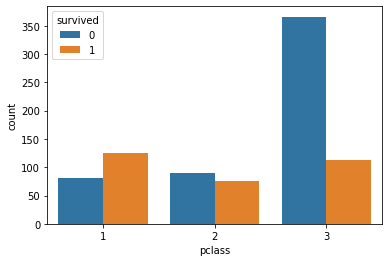

In [10]:
sns.countplot(train.pclass,hue = train.survived)
plt.show()
#ratio of pclass '3' survived least

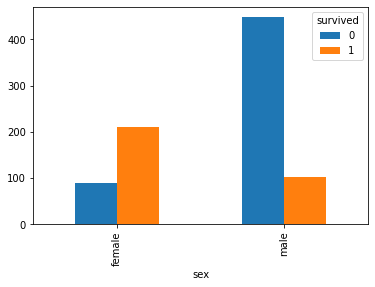

In [11]:
pd.crosstab(train.sex, train.survived).plot(kind = 'bar')
plt.show()
# males died more compared to females

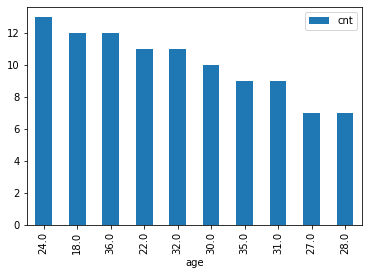

In [12]:
x = train.groupby('age')['survived'].agg(cnt='sum').reset_index().sort_values('cnt',ascending = False)
x.iloc[:10,].plot('age','cnt',kind = 'bar')
plt.show()
#It seems 18-28 years died the most

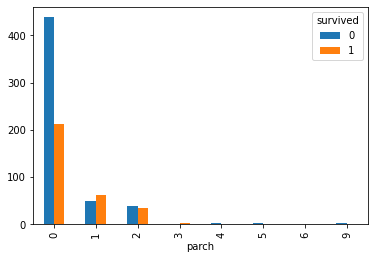

In [13]:
pd.crosstab(train.parch,train.survived).plot(kind = 'bar')
plt.show()
#It seems that people with no children travelling survived the most

<AxesSubplot:xlabel='sibsp'>

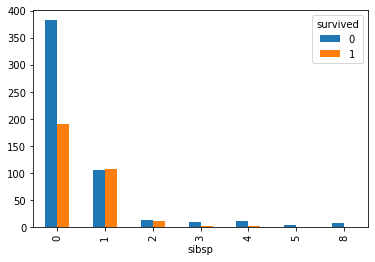

In [14]:
pd.crosstab(train.sibsp,train.survived).plot(kind = 'bar')

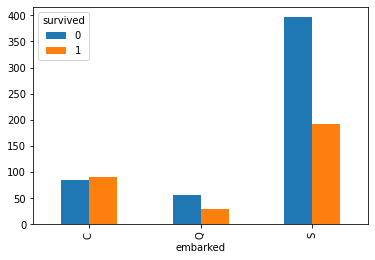

In [15]:
pd.crosstab(train.embarked,train.survived).plot(kind = 'bar')
plt.show()
#It seems that people embarked from S survived the most

<AxesSubplot:xlabel='pclass'>

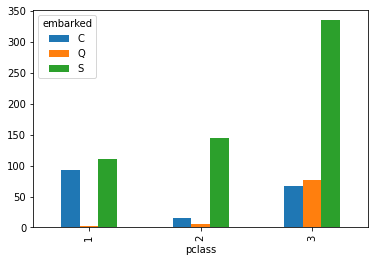

In [16]:
pd.crosstab(train.pclass,train.embarked).plot(kind = 'bar')

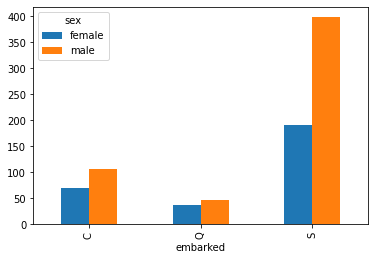

In [17]:
pd.crosstab(train.embarked,train.sex).plot(kind = 'bar')
plt.show()

<AxesSubplot:>

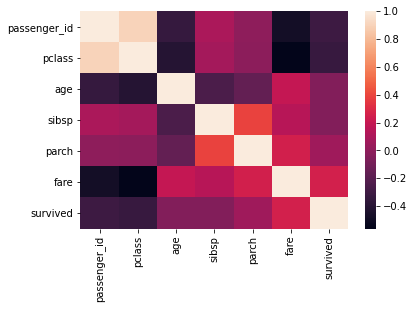

In [18]:
sns.heatmap(train.corr())

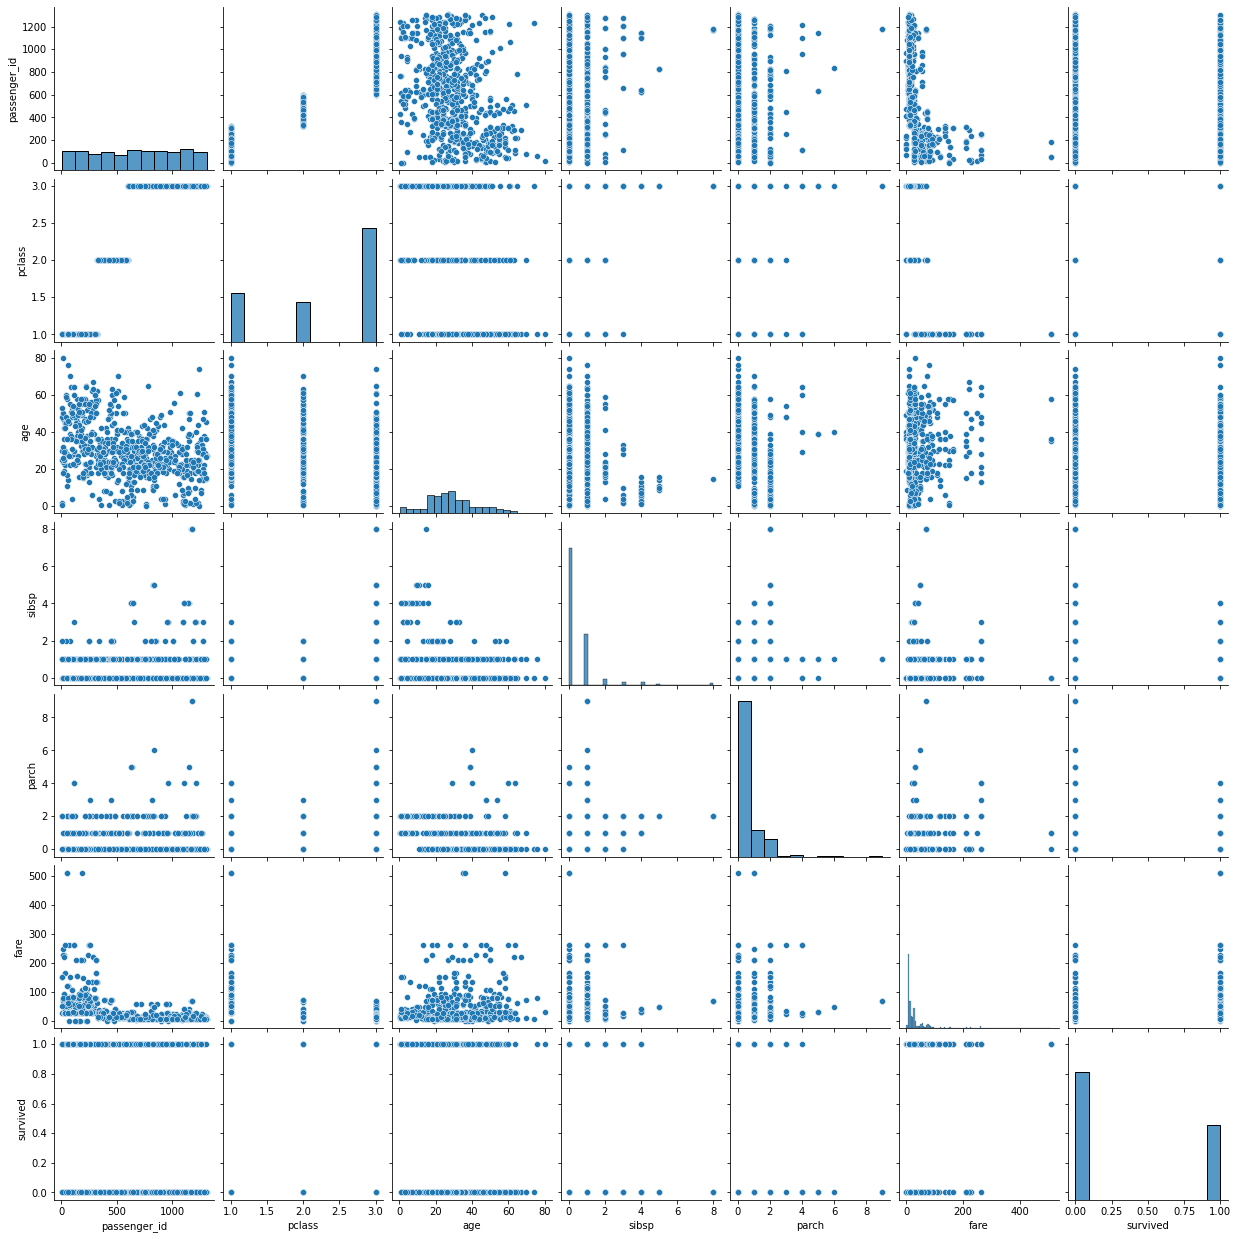

In [19]:
sns.pairplot(train)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


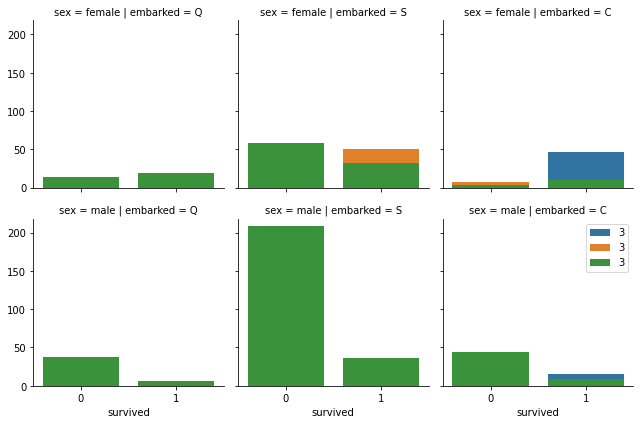

In [20]:
f = sns.FacetGrid(train,col= "embarked",row = 'sex',hue = "pclass")
f.map(sns.countplot,"survived")
plt.legend(train.pclass)
plt.show()

In [21]:
train

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,0


In [22]:
train[train.embarked.isnull()]
train.embarked.replace(np.nan,'S',inplace =True)

In [23]:
test.fare.replace(np.nan,14,inplace =True)

In [24]:
train.drop('cabin',axis = 1,inplace =True)

In [25]:
test.drop('cabin',axis = 1,inplace =True)

In [26]:
x = train.groupby('age')['survived'].agg(cnt='sum').reset_index().sort_values('cnt')

In [27]:
x.tail(n=15)

,age,cnt
28,21.0,6
9,4.0,6
33,25.0,7
27,20.0,7
36,27.0,7
37,28.0,7
39,29.0,7
41,31.0,9
47,35.0,9
40,30.0,10


In [28]:
train.name[0].split(',')[1].split('.')[0]

' Miss'

In [29]:
for x,y in train.iterrows():

    train.loc[x,'salutation'] = train.loc[x,'name'].split(',')[1].split('.')[0]

In [30]:
train.salutation.unique()

array([' Miss', ' Mr', ' Mrs', ' Master', ' Dr', ' Ms', ' Mme', ' Col',
       ' Sir', ' Rev', ' Major', ' Jonkheer', ' Capt', ' the Countess',
       ' Mlle'], dtype=object)

In [31]:
ls = [' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer']
def title(x):
    if x in ls:
        if x in [' Master', ' Don', ' Rev', ' Dr', ' Mme',' Major',' Sir', ' Mlle', ' Col', ' Capt',' Jonkheer']:
            return " Mr"
        elif(x in [' Ms',' Lady']):
            return " Miss"
        else:
            return " Mrs"
    else:
        return x
    

In [32]:
train['salutation'] = train.salutation.apply(title)

In [33]:
train.age[(train.age == 0) & (train.survived == 1) & (train.salutation == ' Mr')] = 24
train.age[(train.age == 0) & (train.survived == 0) & (train.salutation == ' Mr')] = 40



C:\Users\Hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  459 non-null    int64  
 1   pclass        459 non-null    int64  
 2   name          459 non-null    object 
 3   sex           459 non-null    object 
 4   age           370 non-null    float64
 5   sibsp         459 non-null    int64  
 6   parch         459 non-null    int64  
 7   ticket        459 non-null    object 
 8   fare          459 non-null    float64
 9   embarked      458 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 36.0+ KB


In [35]:
for x,y in test.iterrows():

    test.loc[x,'salutation'] = test.loc[x,'name'].split(',')[1].split('.')[0]
    
test['salutation'] = test.salutation.apply(title)

In [36]:
test.age.replace(np.nan,30,inplace = True)

In [37]:
train['family'] = train['sibsp'] + train['parch']
test['family'] = test['sibsp'] + test['parch']

In [38]:
train.drop(['sibsp','parch'],axis = 1,inplace = True)

In [39]:
test.drop(['sibsp','parch'],axis = 1,inplace = True)

In [40]:
test.salutation[test.salutation == ' Dona'] = ' Mrs'

C:\Users\Hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### H0: Survival is independent of Pclass


In [41]:
dfn = pd.crosstab(train.survived,train.pclass)

In [42]:
stats.chi2_contingency(dfn)
#Since p value is too small, we reject null hypothesis
# Pvalue have significant role in Survival 

(92.97586920691387,
 6.46467247325729e-21,
 2,
 array([[130.14352941, 104.87294118, 301.98352941],
        [ 75.85647059,  61.12705882, 176.01647059]]))

In [43]:
dfn = pd.crosstab(train.survived,train.sex)

In [44]:
stats.chi2_contingency(dfn)

(219.1127121438828,
 1.4122950483397253e-49,
 1,
 array([[188.89764706, 348.10235294],
        [110.10235294, 202.89764706]]))

In [45]:
dfn = pd.crosstab(train.survived,train.salutation)
stats.chi2_contingency(dfn)

(221.5937288221142,
 7.612602865477577e-49,
 2,
 array([[108.66352941, 349.99764706,  78.33882353],
        [ 63.33647059, 204.00235294,  45.66117647]]))

In [46]:
dfn = pd.crosstab(train.survived,train.name)
stats.chi2_contingency(dfn)

(850.0000000000001,
 0.4742016527486154,
 848,
 array([[0.63176471, 0.63176471, 0.63176471, ..., 0.63176471, 0.63176471,
         0.63176471],
        [0.36823529, 0.36823529, 0.36823529, ..., 0.36823529, 0.36823529,
         0.36823529]]))

In [47]:
train.drop('name',axis = 1 , inplace = True)
test.drop('name',axis = 1 , inplace = True)

In [48]:
new_train = pd.get_dummies(train,columns = ['salutation','sex','embarked'],drop_first = True)

In [49]:
new_train

,passenger_id,pclass,age,ticket,fare,survived,family,salutation_ Mr,salutation_ Mrs,sex_male,embarked_Q,embarked_S
0,1216,3,NaN,335432,7.7333,1,0,0,0,0,1,0
1,699,3,38.0,315089,8.6625,0,0,1,0,1,0,1
2,1267,3,30.0,345773,24.1500,0,2,0,1,0,0,1
3,449,2,54.0,29105,23.0000,1,4,0,1,0,0,1
4,576,2,40.0,28221,13.0000,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,55.0,680,50.0000,0,0,1,0,1,0,1
846,174,1,58.0,11771,29.7000,0,0,1,0,1,0,0
847,467,2,24.0,244367,26.0000,1,1,0,1,0,0,1
848,1112,3,3.0,SOTON/O.Q. 3101315,13.7750,0,2,0,0,0,0,1


In [50]:
new_train.drop('ticket',axis = 1,inplace = True)


In [51]:
new_train

,passenger_id,pclass,age,fare,survived,family,salutation_ Mr,salutation_ Mrs,sex_male,embarked_Q,embarked_S
0,1216,3,NaN,7.7333,1,0,0,0,0,1,0
1,699,3,38.0,8.6625,0,0,1,0,1,0,1
2,1267,3,30.0,24.1500,0,2,0,1,0,0,1
3,449,2,54.0,23.0000,1,4,0,1,0,0,1
4,576,2,40.0,13.0000,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,55.0,50.0000,0,0,1,0,1,0,1
846,174,1,58.0,29.7000,0,0,1,0,1,0,0
847,467,2,24.0,26.0000,1,1,0,1,0,0,1
848,1112,3,3.0,13.7750,0,2,0,0,0,0,1
